# Predicting Intel Stock Price using Linear Regression

In [1]:
import numpy as np
import pandas as pd
from sklearn import datasets
from sklearn import model_selection
from sklearn import metrics

import matplotlib.pyplot as plt
%matplotlib inline

In [2]:
df = pd.read_csv("data/INTC.csv")

In [3]:
df.head()

,Date,Open,High,Low,Close,Adj Close,Volume
0,2018-09-10,46.560001,46.759998,46.230000,46.299999,45.137581,21522400
1,2018-09-11,46.000000,46.029999,44.889999,44.930000,43.801979,32455300
2,2018-09-12,44.560001,44.980000,44.060001,44.930000,43.801979,29778700
3,2018-09-13,45.680000,45.849998,45.110001,45.570000,44.425911,18657100
4,2018-09-14,45.779999,45.970001,45.349998,45.540001,44.396664,22998700


Show some of the information about your data, e.g. how many rows, what data types

In [ ]:
df.info()

Plotting the graph of Stock Prices against Date 

In [ ]:
df.plot(x="Date",y=["Close","Open","High","Low","Adj Close"])

The various stock prices tend to follow the same trend, we will pick only 1 type of stock price to predict which is "Close", the closing price of the stock on a particular day.

Various stock prices and Volume data has different scales, if you want to visualize and plot the graph out, we will use matplotlib directly to plot

In [ ]:
# Define Date as the X-axis and convert dataframe to a numpy array
print(type(df))
x=df["Date"].values
print(type(x))

In [ ]:
# Print out the values and check the size
# print(x)
print(len(x))

In [ ]:
# define the first y-axis which is all stock prices by dropping/removing the Date(x-axis) and Volume(data with different scale)
df2=df.drop(columns=["Date","Volume"])
df2.head()
y1=df2.values
# print(y1)
print(len(y1))

In [ ]:
y2=df["Volume"].values
# print(y2)
print(len(y2))

In [ ]:
fig=plt.figure(figsize=(12, 6))
ax1=fig.add_subplot(111)
ax1.plot(x,y1)
plt.title('Stock features against Date',fontsize=20)
ax1.set_xlabel('Date')
ax1.set_ylabel('Stock prices')
ax2 = ax1.twinx()
ax2.set_ylabel('Volume')
ax2.plot(x,y2,'c')


When creating the Linear Regression Model, "Date" is a sensitive factor
Date is a string and it can mean

In [4]:
df["Date"] = pd.to_datetime(df.Date,format='%Y-%m-%d')

In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 251 entries, 0 to 250
Data columns (total 7 columns):
Date         251 non-null datetime64[ns]
Open         251 non-null float64
High         251 non-null float64
Low          251 non-null float64
Close        251 non-null float64
Adj Close    251 non-null float64
Volume       251 non-null int64
dtypes: datetime64[ns](1), float64(5), int64(1)
memory usage: 13.8 KB


Scikit-learn will not accept String or Timestamp as the data, so we will need to convert the "Date" into a much simplier data that scikitlearn can accept

In [6]:
newdate = df["Date"]

df4=pd.DataFrame({"year": newdate.dt.year,
              "month": newdate.dt.month,
              "day": newdate.dt.day,
              "hour": newdate.dt.hour,
              "dayofyear": newdate.dt.dayofyear,
              "week": newdate.dt.week,
              "weekofyear": newdate.dt.weekofyear,
              "dayofweek": newdate.dt.dayofweek,
              "weekday": newdate.dt.weekday,
              "quarter": newdate.dt.quarter,
             })


In [7]:
df3=df.drop(columns=["Date"])
df5=pd.concat([df4,df3],axis=1)
df5.head()

,year,month,day,hour,dayofyear,week,weekofyear,dayofweek,weekday,quarter,Open,High,Low,Close,Adj Close,Volume
0,2018,9,10,0,253,37,37,0,0,3,46.560001,46.759998,46.230000,46.299999,45.137581,21522400
1,2018,9,11,0,254,37,37,1,1,3,46.000000,46.029999,44.889999,44.930000,43.801979,32455300
2,2018,9,12,0,255,37,37,2,2,3,44.560001,44.980000,44.060001,44.930000,43.801979,29778700
3,2018,9,13,0,256,37,37,3,3,3,45.680000,45.849998,45.110001,45.570000,44.425911,18657100
4,2018,9,14,0,257,37,37,4,4,3,45.779999,45.970001,45.349998,45.540001,44.396664,22998700


Our data is now ready for model training.

In [8]:
df5.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 251 entries, 0 to 250
Data columns (total 16 columns):
year          251 non-null int64
month         251 non-null int64
day           251 non-null int64
hour          251 non-null int64
dayofyear     251 non-null int64
week          251 non-null int64
weekofyear    251 non-null int64
dayofweek     251 non-null int64
weekday       251 non-null int64
quarter       251 non-null int64
Open          251 non-null float64
High          251 non-null float64
Low           251 non-null float64
Close         251 non-null float64
Adj Close     251 non-null float64
Volume        251 non-null int64
dtypes: float64(5), int64(11)
memory usage: 31.5 KB


In [65]:
# Suggest to split the data using this way since the data is a time series data
train=df5[:200]
test=df5[200:]

In [10]:
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 200 entries, 0 to 199
Data columns (total 16 columns):
year          200 non-null int64
month         200 non-null int64
day           200 non-null int64
hour          200 non-null int64
dayofyear     200 non-null int64
week          200 non-null int64
weekofyear    200 non-null int64
dayofweek     200 non-null int64
weekday       200 non-null int64
quarter       200 non-null int64
Open          200 non-null float64
High          200 non-null float64
Low           200 non-null float64
Close         200 non-null float64
Adj Close     200 non-null float64
Volume        200 non-null int64
dtypes: float64(5), int64(11)
memory usage: 25.1 KB


In [11]:
test.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 51 entries, 200 to 250
Data columns (total 16 columns):
year          51 non-null int64
month         51 non-null int64
day           51 non-null int64
hour          51 non-null int64
dayofyear     51 non-null int64
week          51 non-null int64
weekofyear    51 non-null int64
dayofweek     51 non-null int64
weekday       51 non-null int64
quarter       51 non-null int64
Open          51 non-null float64
High          51 non-null float64
Low           51 non-null float64
Close         51 non-null float64
Adj Close     51 non-null float64
Volume        51 non-null int64
dtypes: float64(5), int64(11)
memory usage: 6.5 KB


In [66]:
X_train=train.drop("Close",axis=1)
y_train=train["Close"]
X_test=test.drop("Close",axis=1)
y_test=test["Close"]

In [67]:
from sklearn.linear_model import LinearRegression
model = LinearRegression()
model.fit(X_train,y_train)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

In [68]:
print(model.coef_)
print(len(model.coef_))

[-1.21623421e+00  6.62642253e-01  2.42293886e-02 -6.93889390e-15
 -2.63146982e-02 -8.27803876e-04 -8.27803876e-04 -4.81336617e-04
 -4.81336617e-04  1.16100807e-01 -4.26645834e-02  8.21747101e-02
  5.46547253e-03  9.69176032e-01 -2.97479413e-10]
15


In [69]:
predictions=model.predict(X_test)

In [70]:
print('MAE:', metrics.mean_absolute_error(y_test, predictions))
print('MSE:', metrics.mean_squared_error(y_test, predictions))
print('RMSE:', np.sqrt(metrics.mean_squared_error(y_test, predictions)))

MAE: 0.05985087521131732
MSE: 0.005049702326482933
RMSE: 0.07106125756333709


In [71]:
train=df5[:200]
test=df5[200:]

In [72]:
test.insert(16,"Predictions",predictions)

In [73]:
test[["Close","Predictions"]].tail()

,Close,Predictions
246,46.980000,46.893889
247,48.919998,48.897602
248,50.099998,50.130276
249,50.919998,50.898453
250,51.590000,51.598743


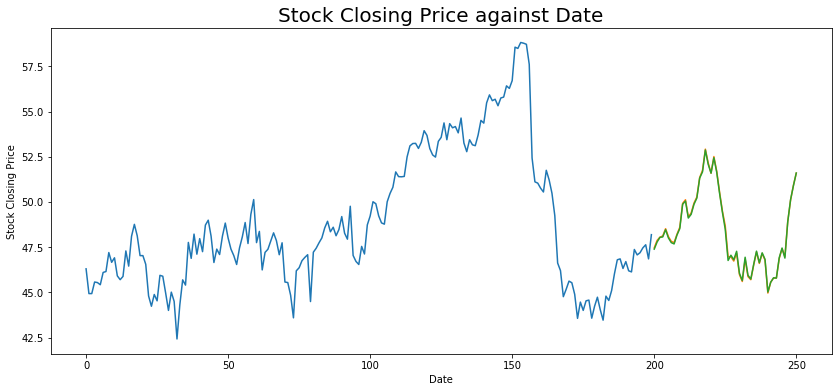

In [74]:
fig=plt.figure(figsize=(14, 6))
plt.title("Stock Closing Price against Date",fontsize=20)
plt.xlabel("Date")
plt.ylabel("Stock Closing Price")
plt.plot(train["Close"])
plt.plot(test[["Close","Predictions"]])


In [75]:
model.score(X_test, y_test)

0.9988429450683003

Seems like the model is doing a very good job at predicting the stock price. It almost seems too good to be true.
Let us try to build another model with the same dataset, but this time, let us only rely on the date as the feature.

In [44]:
df5.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 251 entries, 0 to 250
Data columns (total 16 columns):
year          251 non-null int64
month         251 non-null int64
day           251 non-null int64
hour          251 non-null int64
dayofyear     251 non-null int64
week          251 non-null int64
weekofyear    251 non-null int64
dayofweek     251 non-null int64
weekday       251 non-null int64
quarter       251 non-null int64
Open          251 non-null float64
High          251 non-null float64
Low           251 non-null float64
Close         251 non-null float64
Adj Close     251 non-null float64
Volume        251 non-null int64
dtypes: float64(5), int64(11)
memory usage: 31.5 KB


In [45]:
train=df5[:200]
test=df5[200:]

In [48]:
X_train=train.drop(["Close","Open","High","Low","Adj Close","Volume"],axis=1)
y_train=train["Close"]
X_test=test.drop(["Close","Open","High","Low","Adj Close","Volume"],axis=1)
y_test=test["Close"]

In [53]:
from sklearn.linear_model import LinearRegression
model = LinearRegression()
model.fit(X_train,y_train)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

In [54]:
print(model.coef_)
print(len(model.coef_))

[-1.14424323e+00  3.62399513e+01  1.18257173e+00  6.21724894e-14
 -1.21377433e+00 -1.53524349e-02 -1.53524349e-02 -2.65088625e-02
 -2.65088625e-02  7.07019270e-01]
10


In [55]:
predictions=model.predict(X_test)
print('MAE:', metrics.mean_absolute_error(y_test, predictions))
print('MSE:', metrics.mean_squared_error(y_test, predictions))
print('RMSE:', np.sqrt(metrics.mean_squared_error(y_test, predictions)))

MAE: 1.6052635062080687
MSE: 3.9873103434482577
RMSE: 1.9968250658102873


In [56]:
test.insert(11,"Predictions",predictions)
test[["Close","Predictions"]].tail()

,Close,Predictions
246,46.980000,46.558332
247,48.919998,46.474112
248,50.099998,46.389892
249,50.919998,46.305672
250,51.590000,46.393430


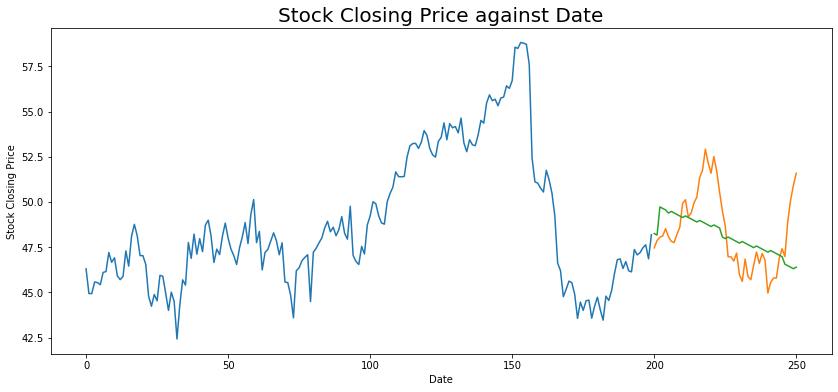

In [63]:
fig=plt.figure(figsize=(14, 6))
plt.title("Stock Closing Price against Date",fontsize=20)
plt.xlabel("Date")
plt.ylabel("Stock Closing Price")
plt.plot(train["Close"])
plt.plot(test[["Close","Predictions"]])

In [58]:
model.score(X_test, y_test)

0.0863744437154641

As you can see, the prediction is very bad when you predict the stock price solely based on the date.